In [1]:
import pandas as pd
import numpy as np
import corr
import pretreat as pt
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression,LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter

In [2]:
f1 = pt.get_data()
attributes = corr.get_attributes(f1)
f1_attr20 = f1[attributes]
# print(f1_attr20)
f1_attr20 = shuffle(f1_attr20)

D:\anaconda3_latest\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


C1SP2               -0.511839
hmin                -0.428580
ETA_Epsilon_4       -0.401014
ATSc3               -0.388795
HOB                 -0.385199
                       ...   
maxsOH               0.495676
LipoaffinityIndex    0.530547
MLogP                0.548946
MDEC-23              0.552716
pIC50                1.000000
Name: pIC50, Length: 506, dtype: float64
ATSp3                0.443449
C2SP2                0.443637
VP-3                 0.444182
SwHBa                0.445961
ATSp1                0.447772
ATSp2                0.449943
VP-4                 0.450466
BCUTp-1h             0.452396
AMR                  0.453209
ATSp5                0.456117
minsOH               0.458949
ATSp4                0.461388
VP-5                 0.466664
CrippenLogP          0.475894
nC                   0.485972
maxsOH               0.495676
C1SP2                0.511839
LipoaffinityIndex    0.530547
MLogP                0.548946
MDEC-23              0.552716
Name: pIC50, dtype: float64


In [3]:
attributes=np.delete(attributes,20)
print(attributes.shape)
new_attributes=['Caco-2','CYP3A4','hERG','HOB','MN']
attributes = np.append(attributes, np.array(new_attributes[1]))
print(attributes)

(20,)
['ATSp3' 'C2SP2' 'VP-3' 'SwHBa' 'ATSp1' 'ATSp2' 'VP-4' 'BCUTp-1h' 'AMR'
 'ATSp5' 'minsOH' 'ATSp4' 'VP-5' 'CrippenLogP' 'nC' 'maxsOH' 'C1SP2'
 'LipoaffinityIndex' 'MLogP' 'MDEC-23' 'CYP3A4']


In [4]:
f1_attr20=f1[attributes]
print(f1_attr20)
print(attributes[20])

            ATSp3  C2SP2      VP-3      SwHBa        ATSp1        ATSp2  \
0     4109.492845     11  8.417904  19.410374  2469.977567  2930.668527   
1     4379.505354     11  8.917904  19.530549  2679.488262  3157.289284   
2     4285.592752     16  7.611580  27.146320  2576.569862  3054.050592   
3     4193.549346     11  8.736554  19.452294  2596.316352  3045.933534   
4     4144.672227     16  7.700096  30.949906  2561.845107  3007.231045   
...           ...    ...       ...        ...          ...          ...   
1969  6170.550312     22  8.032227  36.466250  3435.707126  4159.009056   
1970  5960.180855     22  7.583319  32.410085  3297.276571  4002.868699   
1971  5911.985670     22  7.605326  32.695525  3275.017812  3971.981132   
1972  4757.182371     16  6.075333  26.034284  2554.725206  3132.708913   
1973  6121.229879     22  8.054234  36.725453  3412.964914  4127.457293   

          VP-4   BCUTp-1h       AMR        ATSp5  ...        ATSp4      VP-5  \
0     6.730082  13.

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(f1_attr20[attributes[:20]],f1_attr20[attributes[20]],train_size=0.80)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1537, 20) (385, 20) (1537,) (385,)


In [6]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [8]:
model.score(X_test,Y_test)

0.9116883116883117

In [9]:
lr_pres_proba = model.predict_proba(X_test) [::, 1]

In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, lr_pres_proba)

In [11]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, lr_pres_proba)

[0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.01 0.01 0.01 0.01 0.02
 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06 0.06 0.09 0.09 0.1  0.1  0.11
 0.11 0.12 0.12 0.16 0.16 0.2  0.2  0.21 0.21 0.22 0.22 0.24 0.24 0.25
 0.25 0.28 0.28 0.3  0.3  0.35 0.35 0.36 0.36 0.4  0.4  0.44 0.44 0.48
 0.48 0.52 0.52 0.55 0.55 0.6  0.6  0.63 0.63 0.69 0.69 1.  ] [0.         0.00350877 0.27368421 0.28070175 0.49824561 0.50526316
 0.51578947 0.51578947 0.51929825 0.52631579 0.5754386  0.58245614
 0.70175439 0.70175439 0.76140351 0.76140351 0.78596491 0.78596491
 0.82105263 0.82105263 0.87017544 0.87017544 0.90175439 0.90175439
 0.90526316 0.90526316 0.90877193 0.90877193 0.91578947 0.91578947
 0.92631579 0.92631579 0.92982456 0.92982456 0.93333333 0.93333333
 0.93684211 0.93684211 0.94385965 0.94385965 0.94736842 0.94736842
 0.95087719 0.95087719 0.96140351 0.96140351 0.96491228 0.96491228
 0.96842105 0.96842105 0.97192982 0.97192982 0.9754386  0.9754386
 0.97894737 0.97894737 0.98245614 0.98245614 0.98596

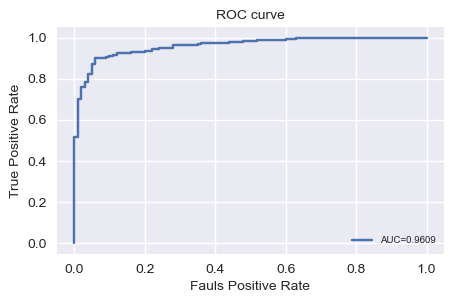

In [12]:
plt.figure(figsize=(5, 3), dpi=100)
plt.style.use('seaborn')
plt.plot(fpr, tpr, label="AUC={:.4f}" .format(auc))
print(fpr,tpr)
plt.legend(loc=4, fontsize=7)
plt.title('ROC curve',fontsize=10)
plt.xlabel('Fauls Positive Rate',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=10)
plt.show()

In [14]:
from sklearn.metrics import classification_report
prediction = model.predict(X_test)#
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.96      0.92      0.94       285

    accuracy                           0.91       385
   macro avg       0.88      0.90      0.89       385
weighted avg       0.92      0.91      0.91       385



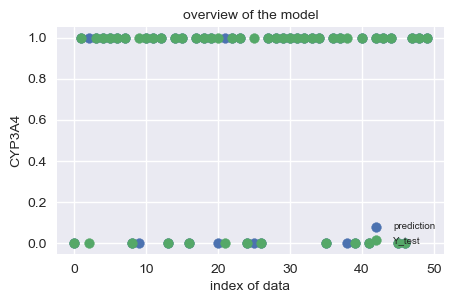

In [15]:
plt.figure(figsize=(5, 3), dpi=100)
plt.scatter(range(0,50),model.predict(X_test)[:50],label="prediction")
plt.legend(loc=4, fontsize=7)
plt.scatter(range(0,50), Y_test[:50],label="Y_test")
plt.legend(loc=4, fontsize=7)
plt.title('overview of the model',fontsize=10)
plt.xlabel('index of data',fontsize=10)
plt.ylabel('CYP3A4',fontsize=10)
plt.show()

In [16]:
import sklearn.metrics as sm
import statsmodels.api as sa

In [17]:
model2=sa.Logit(Y_train,X_train)
result=model2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.216994
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 CYP3A4   No. Observations:                 1537
Model:                          Logit   Df Residuals:                     1517
Method:                           MLE   Df Model:                           19
Date:                Tue, 28 Dec 2021   Pseudo R-squ.:                  0.6259
Time:                        17:54:47   Log-Likelihood:                -333.52
converged:                       True   LL-Null:                       -891.46
Covariance Type:            nonrobust   LLR p-value:                9.199e-225
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ATSp3                 0.0221      0.004      5.770      0.000       0.015       0.030
C2SP2   

In [18]:
predictedValue=model2.fit().predict(X_test)
p2=predictedValue.copy(deep=True)
#print(classification_report(Y_test,predictedValue))
p2.loc[predictedValue>=0.5]=1
p2.loc[predictedValue<0.5]=0
print(classification_report(Y_test,p2))
#print(predictedValue)

Optimization terminated successfully.
         Current function value: 0.216994
         Iterations 9
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       100
           1       0.95      0.94      0.95       285

    accuracy                           0.92       385
   macro avg       0.89      0.90      0.90       385
weighted avg       0.92      0.92      0.92       385



In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,p2)
print(confusion_matrix)

[[ 87  13]
 [ 18 267]]


Accuracy: 0.9194805194805195
Precision: 0.9535714285714286
Recall: 0.9368421052631579


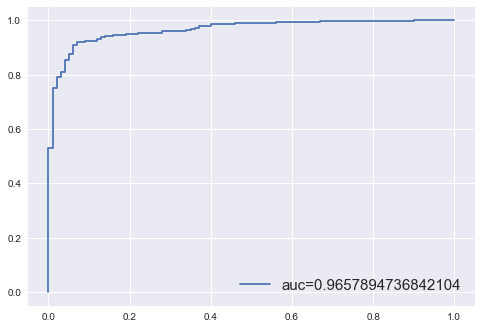

In [20]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test,p2))
print("Precision:",metrics.precision_score(Y_test,p2))
print("Recall:",metrics.recall_score(Y_test,p2))
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr2, tpr2, _ = metrics.roc_curve(Y_test,predictedValue)
auc2 = metrics.roc_auc_score(Y_test,predictedValue)
plt.plot(fpr2,tpr2,label="auc="+str(auc2))
plt.legend(loc=4,fontsize=15)
plt.show()

In [43]:
print(result.params)
odds_ratio=np.exp(result.params)
print(odds_ratio)

ATSp3                 0.017762
C2SP2                -0.285833
VP-3                 -0.255395
SwHBa                 0.195563
ATSp1                 0.022312
ATSp2                -0.047901
VP-4                  0.239642
BCUTp-1h              0.331500
AMR                   0.056164
ATSp5                -0.001670
minsOH                0.537165
ATSp4                -0.000869
VP-5                  2.878197
CrippenLogP          -0.340518
nC                    2.255607
maxsOH               -0.472128
C1SP2                -0.236074
LipoaffinityIndex    -0.224112
MLogP               -13.552373
MDEC-23               0.029812
dtype: float64
ATSp3                 1.017920
C2SP2                 0.751388
VP-3                  0.774611
SwHBa                 1.215996
ATSp1                 1.022562
ATSp2                 0.953228
VP-4                  1.270795
BCUTp-1h              1.393056
AMR                   1.057771
ATSp5                 0.998332
minsOH                1.711149
ATSp4                 0.